In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer

In [14]:
train = pd.read_csv('train.csv',index_col=0)
test=pd.read_csv('test.csv',index_col=0)

['Age', 'BusinessTravel=Non-Travel', 'BusinessTravel=Travel_Frequently', 'BusinessTravel=Travel_Rarely', 'Department=Human Resources', 'Department=Research & Development', 'Department=Sales', 'Education', 'EducationField=Human Resources', 'EducationField=Life Sciences', 'EducationField=Marketing', 'EducationField=Medical', 'EducationField=Other', 'EducationField=Technical Degree', 'Gender=Female', 'Gender=Male', 'JobRole=Healthcare Representative', 'JobRole=Human Resources', 'JobRole=Laboratory Technician', 'JobRole=Manager', 'JobRole=Manufacturing Director', 'JobRole=Research Director', 'JobRole=Research Scientist', 'JobRole=Sales Executive', 'JobRole=Sales Representative', 'MaritalStatus=Divorced', 'MaritalStatus=Married', 'MaritalStatus=Single', 'Over18=Y', 'OverTime=No', 'OverTime=Yes']
[ -2.54254813 -67.46259087  44.74618792   8.57858748 -13.68611947
 -20.41060892  19.95891291  -4.09008437  81.91535102 -41.72876068
   6.47115994 -55.20577847 -45.42518508  39.83539779 -23.69553676


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\install_path\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


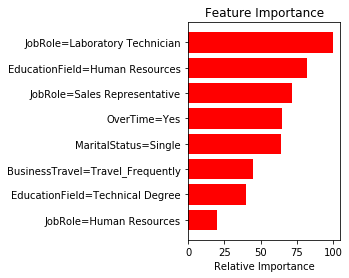

In [15]:
# 处理Attrition字段
train['Attrition']=train['Attrition'].map(lambda x:1 if x=='Yes' else 0)
from sklearn.preprocessing import LabelEncoder

# 去掉没用的列 员工号码，标准工时（=80）
train = train.drop(['EmployeeNumber', 'StandardHours'], axis=1)
test = test.drop(['EmployeeNumber', 'StandardHours'], axis=1)

# 对于分类特征进行特征值编码
attr=['Age','BusinessTravel','Department','Education','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

"""
# 采用label encoder
lbe_list=[]
for feature in attr:
    lbe=LabelEncoder()
    train[feature]=lbe.fit_transform(train[feature])
    test[feature]=lbe.transform(test[feature])
    lbe_list.append(lbe)
#print(train)
"""

from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_valid, y_train, y_valid = train_test_split(train.drop('Attrition',axis=1), train['Attrition'], test_size=0.2, random_state=42)

train_features = X_train[attr]
# 特征向量化，不产生稀疏矩阵
dvec=DictVectorizer(sparse=True)
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))
print(dvec.feature_names_)


def show_feature_importance(feature_list, feature_importance):
	# 设定阈值
	fi_threshold = 20
	# 重要特征的下标
	important_idx = np.where(feature_importance > fi_threshold)[0]
	# 特征名称
	important_features = [feature_list[i] for i in important_idx]
	# 重要特征
	sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
	# 可视化
	pos = np.arange(sorted_idx.shape[0]) + 0.5
	plt.subplot(1, 2, 2)
	plt.title('Feature Importance')
	plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], color='r',align='center')
	plt.yticks(pos, [important_features[i] for i in sorted_idx[::-1]])
	plt.xlabel('Relative Importance')
	plt.draw()
	plt.show()

# 采用LR模型
model = LogisticRegression(max_iter=100, verbose=True, random_state=33, tol=1e-4)
model.fit(train_features, y_train)

# 获取特征重要性
feature_importance = coef = model.coef_[0]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
#feature_importance = -100.0 * (feature_importance / feature_importance.max())
print(feature_importance)
print(feature_importance[0])
print(feature_importance[15])
# 重要特征可视化
show_feature_importance(dvec.feature_names_, feature_importance)
